# PyGEM Simple Test with Daily Climate Data

Albin Wells, Brandon Tober, David Rounce<br>
Carnegie Mellon University<br>
Created: 29OCT2025<br> <br>
Objective: demonstrate a simple calibration and simulation application for PyGEM with daily data.<br>

This demonstration  utilizes PyGEM's *sample_data* for Gulkana Glacier (RGI60-01.00570), which should have been downloaded during model installation and setup (see [here](https://pygem.readthedocs.io/en/latest/install_pygem.html)).<br>

> **⚠️ Warning:**<br>
> Ensure that the `root` parameter in PyGEM configuration file points to the correct path for the sample dataset (should end in */sample_data_daily/*, not */sample_data/* or */sample_data_tw/*).<br>

We'll use the bash `grep` function for this. The following cell begins with `%%bash` which is a "cell magic" that allows you to run Bash commands directly within a notebook cell. Any command in a cell that starts with `%%bash` will be executed in a Bash shell.

In [1]:
%%bash
grep 'root:' ~/PyGEM/config.yaml

root: /Users/btober/PyGEM/sample_data/sample_data # note, this parameter must be modfied as to point to the appropriate location. all other paths are assumed relative to this (inputs and outputs).


If the incorrect path is set, you may manually modify with the text editor of your choice so that the `root` parameter is set to point to wherever the appropriate sample dataset is located on your computer.<br>

Proceeding with the simple test, the following steps will be completed:
1. Compare daily and monthly climate data
2. Calibrate model and run simulation with monthly and daily ERA5 data
3. Plot outputs

First, some quick Python imports:

In [2]:
### imports ###
import os, sys, glob, json
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
# pygem imports
from pygem.setup.config import ConfigManager
# instantiate ConfigManager
config_manager = ConfigManager()
# read the config
pygem_prms = config_manager.read_config()   # NOTE: ensure that your root path in ~/PyGEM/config.yaml points to
                                            # the appropriate location. If any errors occur, check this first.
rootpath=pygem_prms['root']

## Comparing daily and monthly climate data

In [3]:
# locate files
monthly_t2m_fp = f"{pygem_prms['root']}/climate_data/ERA5/ERA5_temp_monthly.nc"
daily_t2m_fp = f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_temp_daily.nc"
monthly_tp_fp = f"{pygem_prms['root']}/climate_data/ERA5/ERA5_totalprecip_monthly.nc"
daily_tp_fp = f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_totalprecip_daily.nc"

# and geopotential files
monthly_geopot_fp = f"{pygem_prms['root']}/climate_data/ERA5/ERA5_geopotential.nc"
daily_geopot_fp = f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_geopotential.nc"

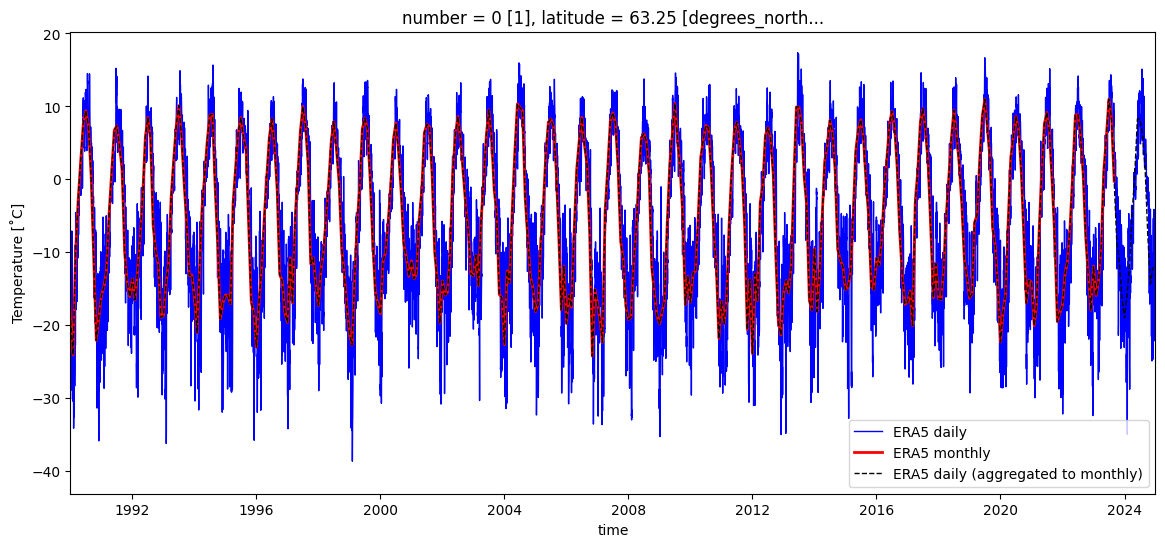

In [4]:
# --- Plot temperature ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 2024.5, 1)

# load data
monthly_t2m_ds = xr.open_dataset(monthly_t2m_fp).load()
monthly_t2m_pixel = monthly_t2m_ds['t2m'].sel(latitude=63.3, longitude=360-145.4, method='nearest') - 273.15

# combine two expver slices into one continuous series
monthly_t2m_pixel = monthly_t2m_pixel.fillna(monthly_t2m_pixel.sel(expver=5))
monthly_t2m_pixel = monthly_t2m_pixel.sel(expver=1)  # drop the extra dimension

daily_t2m_ds = xr.open_dataset(daily_t2m_fp).load()
daily_t2m_pixel = daily_t2m_ds['t2m'].sel(latitude=63.3, longitude=-145.4, method='nearest') - 273.15
daily_t2m_pixel_ms = daily_t2m_pixel.resample(time='1MS').mean()
    
# add time series
daily_t2m_pixel.plot(ax=ax1, linewidth=1, color='b', label='ERA5 daily')
monthly_t2m_pixel.plot(ax=ax1, linewidth=2, color='r', label='ERA5 monthly')
daily_t2m_pixel_ms.plot(ax=ax1, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

ax1.patch.set_visible(False)
ax1.set_ylabel('Temperature [˚C]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()

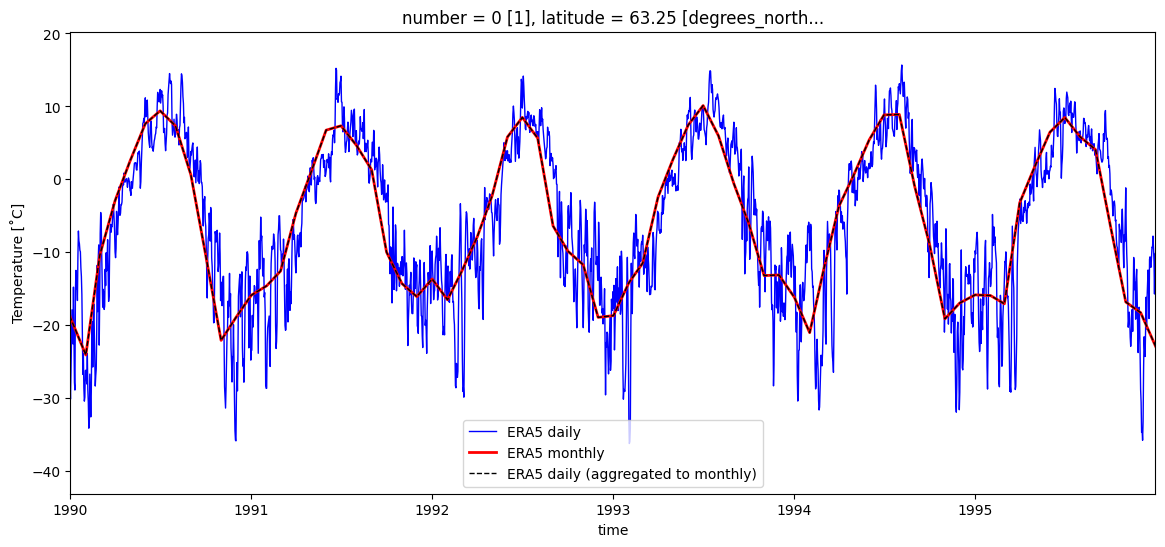

In [5]:
# --- Plot temperature ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 1995.5, 1)

# load data
monthly_t2m_ds = xr.open_dataset(monthly_t2m_fp).load()
monthly_t2m_pixel = monthly_t2m_ds['t2m'].sel(latitude=63.3, longitude=360-145.4, method='nearest') - 273.15

# combine two expver slices into one continuous series
monthly_t2m_pixel = monthly_t2m_pixel.fillna(monthly_t2m_pixel.sel(expver=5))
monthly_t2m_pixel = monthly_t2m_pixel.sel(expver=1)  # drop the extra dimension

daily_t2m_ds = xr.open_dataset(daily_t2m_fp).load()
daily_t2m_pixel = daily_t2m_ds['t2m'].sel(latitude=63.3, longitude=-145.4, method='nearest') - 273.15
daily_t2m_pixel_ms = daily_t2m_pixel.resample(time='1MS').mean()
    
# add time series
daily_t2m_pixel.plot(ax=ax1, linewidth=1, color='b', label='ERA5 daily')
monthly_t2m_pixel.plot(ax=ax1, linewidth=2, color='r', label='ERA5 monthly')
daily_t2m_pixel_ms.plot(ax=ax1, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

ax1.patch.set_visible(False)
ax1.set_ylabel('Temperature [˚C]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()

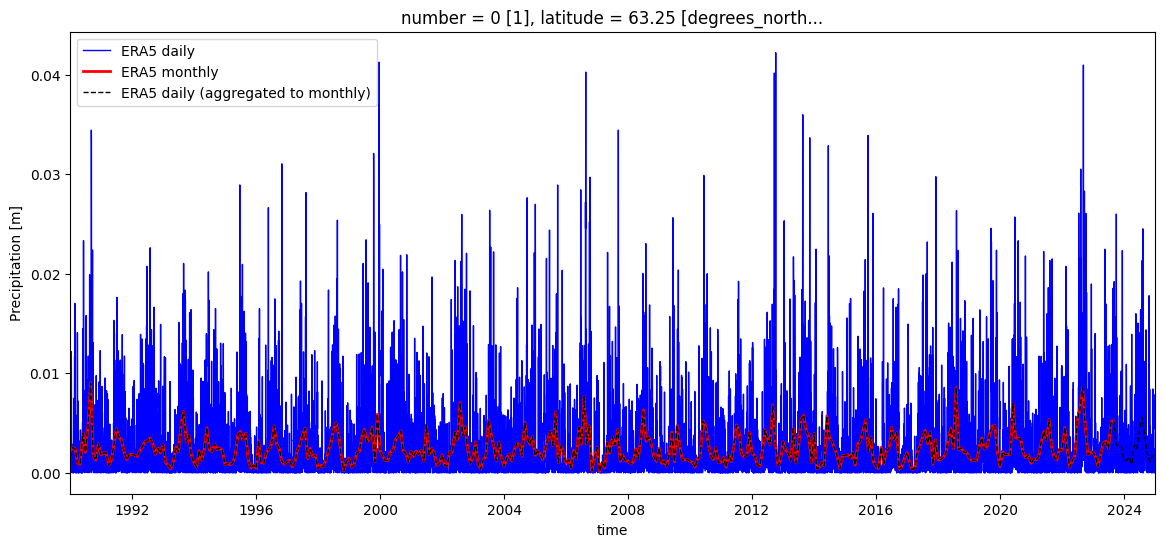

In [6]:
# --- Plot precipitation ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 2024.5, 1)

# load data
monthly_tp_ds = xr.open_dataset(monthly_tp_fp).load()
monthly_tp_pixel = monthly_tp_ds['tp'].sel(latitude=63.3, longitude=360-145.4, method='nearest')

# combine two expver slices into one continuous series
monthly_tp_pixel = monthly_tp_pixel.fillna(monthly_tp_pixel.sel(expver=5))
monthly_tp_pixel = monthly_tp_pixel.sel(expver=1)  # drop the extra dimension

daily_tp_ds = xr.open_dataset(daily_tp_fp).load()
daily_tp_pixel = daily_tp_ds['tp'].sel(latitude=63.3, longitude=-145.4, method='nearest')
days_in_month = daily_tp_pixel['time'].dt.days_in_month
daily_tp_pixel_ms = daily_tp_pixel.resample(time='1MS').sum() / days_in_month # convert monthly values to [m/day]

# add time series
daily_tp_pixel.plot(ax=ax1, linewidth=1, color='b', label='ERA5 daily')
monthly_tp_pixel.plot(ax=ax1, linewidth=2, color='r', label='ERA5 monthly')
daily_tp_pixel_ms.plot(ax=ax1, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

# ax1.set_ylim(0,)
ax1.patch.set_visible(False)
ax1.set_ylabel('Precipitation [m]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()

Great! The daily and monthly climate data both make sense, and are identical when the daily data is aggregated to monthly.

## Apply geopotential data to correct data to glacier elevation

Now, we can also assess the climate at the mean elevation of Gulkana Glacier

In [7]:
gulkana_mean_elev = 1850 # rough mean elevation
L_km = -6.5 # lapse rate (˚C / km)

# load monthly geopotential data
monthly_geopot_ds = xr.open_dataset(monthly_geopot_fp).load()
monthly_geopot_pixel = monthly_geopot_ds['z'].sel(latitude=63.3, longitude=360-145.4, method='nearest') # m^2 / s^2
monthly_geopot_elev = (monthly_geopot_pixel / 9.81) - 2 # convert 2m temp to elevation at the surface
monthly_temp_corr = (gulkana_mean_elev - monthly_geopot_elev) * (L_km / 1000) # apply constant lapse rate

# load daily geopotential data
daily_geopot_ds = xr.open_dataset(daily_geopot_fp).load()
daily_geopot_pixel = daily_geopot_ds['z'].sel(latitude=63.3, longitude=-145.4, method='nearest') # m^2 / s^2
daily_geopot_elev = (daily_geopot_pixel / 9.81) - 2 # convert 2m temp to elevation at the surface
daily_temp_corr = (gulkana_mean_elev - daily_geopot_elev) * (L_km / 1000) # apply constant lapse rate

# apply lapse rate to data
monthly_t2m_pixel_lr = monthly_t2m_pixel.values + monthly_temp_corr.values
daily_t2m_pixel_lr = daily_t2m_pixel.values + daily_temp_corr.values
daily_t2m_pixel_ms_lr = daily_t2m_pixel_ms.values + daily_temp_corr.values

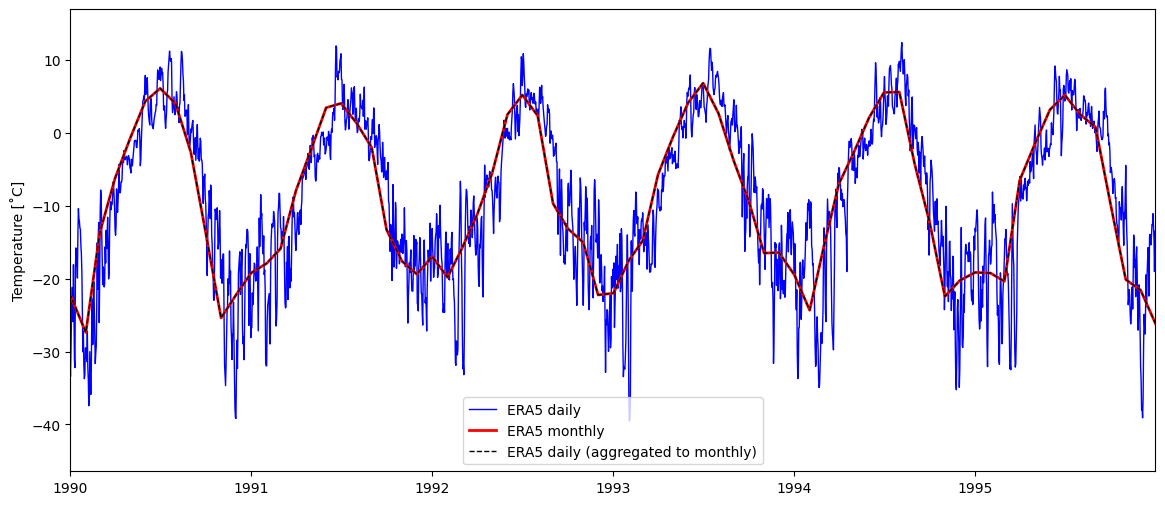

In [8]:
# --- Plot temperature ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 1995.5, 1)

# add time series
ax1.plot(daily_t2m_pixel.time, daily_t2m_pixel_lr, linewidth=1, color='b', label='ERA5 daily')
ax1.plot(monthly_t2m_pixel.time, monthly_t2m_pixel_lr, linewidth=2, color='r', label='ERA5 monthly')
ax1.plot(daily_t2m_pixel_ms.time, daily_t2m_pixel_ms_lr, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

ax1.patch.set_visible(False)
ax1.set_ylabel('Temperature [˚C]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()

In [9]:
# compare PDDs between daily and monthly data around the mean elevation of Gulkana
monthly_era5_series = pd.Series(monthly_t2m_pixel_lr, index=pd.to_datetime(monthly_t2m_pixel.time))
daily_era5_series = pd.Series(daily_t2m_pixel_lr, index=pd.to_datetime(daily_t2m_pixel.time))

# function to calculate annual positive degree-days
def annual_pdd(ts):
    ts_pos = ts.copy()
    ts_pos[ts_pos < 0] = 0  # only positive temperatures
    if (ts_pos.index[1] - ts_pos.index[0]).days > 1: # if data is not daily
        ts_pos = ts_pos * ts_pos.index.days_in_month
        
    return ts_pos.groupby(ts_pos.index.year).sum()

# calculate annual PDDs
pdd_era5_monthly = annual_pdd(monthly_era5_series)
pdd_era5_daily = annual_pdd(daily_era5_series)

pdd_era5_df = pd.DataFrame({'PDD_era5_daily': pdd_era5_daily, 'PDD_era5_monthly': pdd_era5_monthly})
pdd_era5_df['perc_diff'] = round(((pdd_era5_df['PDD_era5_daily'] - pdd_era5_df['PDD_era5_monthly'])
                                  / pdd_era5_df['PDD_era5_monthly'] * 100), 2)
pdd_era5_df.loc['2000':'2019']

,PDD_era5_daily,PDD_era5_monthly,perc_diff
2000,246.561466,218.299137,12.95
2001,352.264632,345.132070,2.07
2002,355.676039,316.249233,12.47
2003,392.413110,359.666823,9.10
2004,633.499274,609.043882,4.02
2005,448.137350,410.629072,9.13
2006,324.170502,267.401953,21.23
2007,489.205431,455.949591,7.29
2008,239.734175,222.396777,7.80
2009,440.748007,379.172751,16.24


## Simple calibration and simulation -- monthly

Perform a simple model calibration and simulation using monthly climate data. See the *[simple_test.ipynb](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/simple_test.ipynb)* notebook for more details on each function.

In [10]:
# update the include_frontalablation key as described above
config_manager.update_config(updates={'time.timestep': 'monthly',
                                      'climate.paths.era5_relpath': '/climate_data/ERA5/',
                                      'climate.paths.era5_temp_fn': 'ERA5_temp_monthly.nc',
                                      'climate.paths.era5_prec_fn': 'ERA5_totalprecip_monthly.nc',
                                      'climate.paths.era5_elev_fn': 'ERA5_geopotential.nc',
                                      'climate.paths.era5_lr_fn': 'ERA5_lapserates_monthly.nc',
                                      'sim.out.export_extra_vars': True})

In [11]:
# run the calibration for Gulkana Glacier
reg = 1
glac_no = 01.00570
reg_str = str(reg).zfill(2)
glacier_str = "{:.5f}".format(glac_no) # preserve trailing 0
!run_calibration -rgi_glac_number {glac_no} -ref_startyear 2000 -ref_endyear 2019 -option_calibration HH2015

Processing: ERA5
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
ERA5 : RGI60-01.00570
2025-11-05 10:57:23: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-11-05 10:57:23: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-11-05 10:57:23: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-11-05 10:57:23: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2025-11-05 10:57:23: oggm.cfg: PARAMS['dl_verify'] changed from `False` to `True`.
2025-11-05 10:57:23: oggm.cfg: PARAMS['use_multiple_flowlines'] changed from `True` to `False`.
2025-11-05 10:57:23: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers
2025-11-05 10:57:24: oggm.workflow: Execute entity tasks [consensus_gridded] on 1 glaciers
2025-11-05 10:57:24: oggm.workflow: Execute entity tasks [dh_1d_to_gdir] on 1 glaciers
2025-11-05 10:57:24: og

In [12]:
# run a present-day simulation
gcm_name = 'ERA5'
suff_mo = 'monthly'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_startyear 2000 -sim_endyear 2019 -option_calibration HH2015 -option_dynamics OGGM -use_regional_glen_a False -outputfn_sfix {suff_mo}

2025-11-05 10:57:26: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-11-05 10:57:26: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-11-05 10:57:26: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-11-05 10:57:26: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-11-05 10:57:26: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-11-05 10:57:26: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
Processing: ERA5
Processing with 1 cores...
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
ERA5 : RGI60-01.00570
2025-11-05 10:57:26: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-11-05 10:57:26: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-11-05 10:57:26: oggm.cfg: Multiprocessing: using all available processors (N=10)
2

In [13]:
# load simulation output
ds_monthly = xr.open_dataset(glob.glob(f'{rootpath}/Output/simulations/{reg_str}/{gcm_name}/stats/{glacier_str}_{gcm_name}_HH2015*_2000_2019_{suff_mo}all.nc*')[0])

## Simple calibration and simulation -- daily

Repeat the above steps with daily climate data

In [14]:
# update the include_frontalablation key as described above
config_manager.update_config(updates={'time.timestep': 'daily',
                                      'climate.paths.era5_relpath': None,
                                      'climate.paths.era5_temp_fn': f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_temp_daily.nc",
                                      'climate.paths.era5_prec_fn': f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_totalprecip_daily.nc",
                                      'climate.paths.era5_elev_fn': f"{pygem_prms['root']}/climate_data/ERA5/ERA5_geopotential.nc",
                                      'climate.paths.era5_lr_fn': f"{pygem_prms['root']}/climate_data/ERA5/ERA5_lapserates_monthly.nc",
                                      'sim.out.export_extra_vars': True})

In [15]:
# # NOTE: we won't rerun the calibration with daily data so we can isolate the difference in simulation output due to the 
    # # daily and monthly climate data (i.e., we use the same model parameters for the simulation)
# !run_calibration -rgi_glac_number {glac_no} -ref_startyear 2000 -ref_endyear 2019 -option_calibration HH2015

In [16]:
# run a present-day simulation
gcm_name = 'ERA5'
suff_d = 'daily'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_startyear 2000 -sim_endyear 2019 -option_calibration HH2015 -option_dynamics OGGM -use_regional_glen_a False -outputfn_sfix {suff_d}

2025-11-05 10:57:29: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-11-05 10:57:29: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-11-05 10:57:29: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-11-05 10:57:29: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-11-05 10:57:29: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-11-05 10:57:29: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
Processing: ERA5
Processing with 1 cores...
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
/Users/btober/Drive/work/gem/PyGEM-repos/PyGEM/pygem/class_climate.py:442: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision

In [17]:
# load simulation output
ds_daily = xr.open_dataset(glob.glob(f'{rootpath}/Output/simulations/{reg_str}/{gcm_name}/stats/{glacier_str}_{gcm_name}_HH2015*_2000_2019_{suff_d}all.nc*')[0])

Compare positive degree-days from the model output

In [18]:
monthly_series = pd.Series(ds_monthly['glac_temp'][0].values - 273.15, index=pd.to_datetime(ds_monthly.time))
daily_series = pd.Series(ds_daily['glac_temp'][0].values - 273.15, index=pd.to_datetime(ds_daily.time))

# function to calculate annual positive degree-days
def annual_pdd(ts):
    ts_pos = ts.copy()
    ts_pos[ts_pos < 0] = 0  # only positive temperatures
    if (ts_pos.index[1] - ts_pos.index[0]).days > 1: # if data is not daily
        ts_pos = ts_pos * ts_pos.index.days_in_month
        
    return ts_pos.groupby(ts_pos.index.year).sum()

# calculate annual PDDs
pdd_monthly = annual_pdd(monthly_series)
pdd_daily = annual_pdd(daily_series)

pdd_df = pd.DataFrame({'PDD_daily': pdd_daily, 'PDD_monthly': pdd_monthly})
pdd_df['percentage_diff'] = round(((pdd_df['PDD_daily'] - pdd_df['PDD_monthly']) / pdd_df['PDD_monthly'] * 100), 1)
pdd_df

,PDD_daily,PDD_monthly,percentage_diff
2000,289.698925,272.663468,6.2
2001,404.977796,398.898718,1.5
2002,415.537125,368.771090,12.7
2003,452.118580,412.170547,9.7
2004,691.438079,675.753479,2.3
2005,514.317022,470.710238,9.3
2006,387.065003,327.005984,18.4
2007,550.362949,504.272962,9.1
2008,296.480291,279.539060,6.1
2009,512.622929,436.047468,17.6


## Plot

Visualize and compare the model outputs.

In [19]:
# --- get monthly data simulation output ---
# pull monthly runoff and resample to annual values
ds_monthly_sum = ds_monthly['glac_runoff'][0].resample(time='YE').sum('time') # monthly runoff
annual_runoff_monthly = ds_monthly_sum.values # append annual runoff to list
annual_area_monthly = ds_monthly['glac_area_annual'][0].values[1:] # pull annual area
annual_mass_monthly = ds_monthly['glac_mass_annual'][0].values[1:] # pull annual mass
annual_abl_monthly = ds_monthly['glac_melt'][0].resample(time='YE').sum('time').values/annual_area_monthly # monthly melt
annual_acc_monthly = ds_monthly['glac_acc'][0].resample(time='YE').sum('time').values/annual_area_monthly # monthly accumulation
annual_cmb_monthly = ds_monthly['glac_massbaltotal'][0].resample(time='YE').sum('time').values/annual_area_monthly # monthly mass balance
year_monthly = (ds_monthly.year.values[:-1:]) # pull years

# --- get daily data simulation output ---
# pull monthly runoff and resample to annual values
ds_daily_sum = ds_daily['glac_runoff'][0].resample(time='YE').sum('time') # monthly runoff
annual_runoff_daily = ds_daily_sum.values # append annual runoff to list
annual_area_daily = ds_daily['glac_area_annual'][0].values[1:] # pull annual area
annual_mass_daily = ds_daily['glac_mass_annual'][0].values[1:] # pull annual mass
annual_abl_daily = ds_daily['glac_melt'][0].resample(time='YE').sum('time').values/annual_area_daily # daily melt
annual_acc_daily = ds_daily['glac_acc'][0].resample(time='YE').sum('time').values/annual_area_daily # daily accumulation
annual_cmb_daily = ds_daily['glac_massbaltotal'][0].resample(time='YE').sum('time').values/annual_area_daily # daily mass balance
year_daily = (ds_daily.year.values[:-1:]) # pull years

Add some daily and monthly data to the plot as well

In [20]:
import calendar

# also get some data at full resolution (monthly or daily)
annual_abl_monthly_fr = ds_monthly['glac_melt'][0].values/np.repeat(annual_area_monthly, 12) # monthly melt
annual_acc_monthly_fr = ds_monthly['glac_acc'][0].values/np.repeat(annual_area_monthly, 12) # monthly accumulation
annual_cmb_monthly_fr = ds_monthly['glac_massbaltotal'][0].values/np.repeat(annual_area_monthly, 12) # monthly mass balance
time_monthly_dates_fr = ds_monthly.time.values # pull years
time_monthly_fr = time_monthly_dates_fr.astype('datetime64[D]').astype(float)  # days since 1970-01-01
time_monthly_fr = 1970 + time_monthly_fr / 365.25 # approximate decimal year

# convert monthly data units to 'per day'
days_in_month = np.array([calendar.monthrange(y, m)[1] for y, m in zip(ds_monthly['time.year'].values, ds_monthly['time.month'].values)])
annual_abl_monthly_fr = annual_abl_monthly_fr / days_in_month
annual_acc_monthly_fr = annual_acc_monthly_fr / days_in_month
annual_cmb_monthly_fr = annual_cmb_monthly_fr / days_in_month

# get area for each day (note: area is only updated annually, so this is an approximation)
days_per_year = np.array([366 if calendar.isleap(y) else 365 for y in year_daily])
annual_abl_daily_fr = ds_daily['glac_melt'][0].values/np.repeat(annual_area_daily, days_per_year) # daily melt
annual_acc_daily_fr = ds_daily['glac_acc'][0].values/np.repeat(annual_area_daily, days_per_year) # daily accumulation
annual_cmb_daily_fr = ds_daily['glac_massbaltotal'][0].values/np.repeat(annual_area_daily, days_per_year) # daily mass balance
time_daily_dates_fr = ds_daily.time.values # pull years
time_daily_fr = time_daily_dates_fr.astype('datetime64[D]').astype(float)  # days since 1970-01-01
time_daily_fr = 1970 + time_daily_fr / 365.25 # approximate decimal year

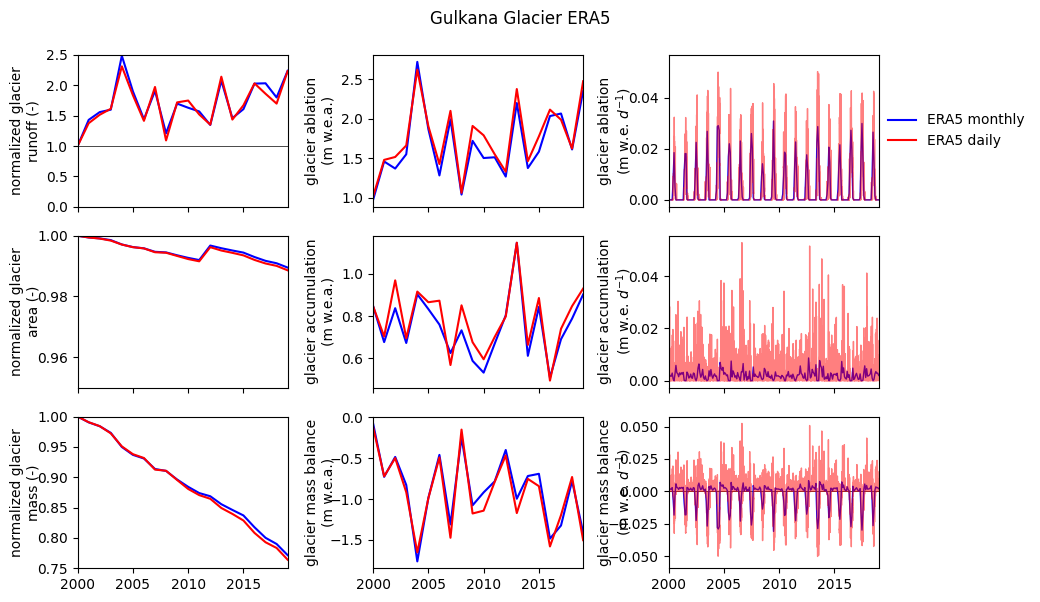

In [21]:
# create 3 x 3 plot with runoff, area, mass
fig,ax = plt.subplots(3,3,figsize=(10.5,6), sharex=True, sharey=False)
ax = ax.flatten()

# plot left column
ax[0].plot(year_monthly, annual_runoff_monthly/annual_runoff_monthly[0], c='b')
ax[0].plot(year_daily, annual_runoff_daily/annual_runoff_daily[0], c='r')
ax[3].plot(year_monthly, annual_area_monthly/annual_area_monthly[0], c='b')
ax[3].plot(year_daily, annual_area_daily/annual_area_daily[0], c='r')
ax[6].plot(year_monthly, annual_mass_monthly/annual_mass_monthly[0], c='b')
ax[6].plot(year_daily, annual_mass_daily/annual_mass_daily[0], c='r')

# plot middle column
ax[1].plot(year_monthly, annual_abl_monthly, c='b')
ax[1].plot(year_daily, annual_abl_daily, c='r')
ax[4].plot(year_monthly, annual_acc_monthly, c='b')
ax[4].plot(year_daily, annual_acc_daily, c='r')
ax[7].plot(year_monthly, annual_cmb_monthly, c='b')
ax[7].plot(year_daily, annual_cmb_daily, c='r')

# plot right column
ax[2].plot(time_monthly_fr, annual_abl_monthly_fr, c='b', lw=1, alpha=1)
ax[2].plot(time_daily_fr, annual_abl_daily_fr, c='r', lw=1, alpha=0.5)
ax[5].plot(time_monthly_fr, annual_acc_monthly_fr, c='b', lw=1, alpha=1)
ax[5].plot(time_daily_fr, annual_acc_daily_fr, c='r', lw=1, alpha=0.5)
ax[8].plot(time_monthly_fr, annual_cmb_monthly_fr, c='b', lw=1, alpha=1)
ax[8].plot(time_daily_fr, annual_cmb_daily_fr, c='r', lw=1, alpha=0.5)

# add hlines
ax[0].axhline(1, c='k', ls='-', lw=0.5, zorder=0)
ax[7].axhline(0, c='k', ls='-', lw=0.5, zorder=0)
ax[8].axhline(0, c='k', ls='-', lw=0.5, zorder=0)

# create legend
ax[2].plot([],[], c='b', label='ERA5 monthly')
ax[2].plot([],[], c='r', label='ERA5 daily')
ax[2].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, borderaxespad=0)

# set x axis limits to temporal extent of our data
ax[0].set_ylim([0,2.5])
ax[3].set_ylim([0.95,1])
ax[6].set_ylim([0.75,1])
ax[0].set_xlim([2000,2019])

# add labels
ax[0].text(-0.25, 0.5, 'normalized glacier\nrunoff (-)', va='center', ha='center', rotation=90, transform=ax[0].transAxes)
ax[3].text(-0.25, 0.5, 'normalized glacier\narea (-)', va='center', ha='center', rotation=90, transform=ax[3].transAxes)
ax[6].text(-0.25, 0.5, 'normalized glacier\nmass (-)', va='center', ha='center', rotation=90, transform=ax[6].transAxes)
ax[1].text(-0.25, 0.5, 'glacier ablation\n(m w.e.a.)', va='center', ha='center', rotation=90, transform=ax[1].transAxes)
ax[4].text(-0.25, 0.5, 'glacier accumulation\n(m w.e.a.)', va='center', ha='center', rotation=90, transform=ax[4].transAxes)
ax[7].text(-0.25, 0.5, 'glacier mass balance\n(m w.e.a.)', va='center', ha='center', rotation=90, transform=ax[7].transAxes)
ax[2].text(-0.25, 0.5, f'glacier ablation\n(m w.e. $d^{{-1}}$)', va='center', ha='center', rotation=90, transform=ax[2].transAxes)
ax[5].text(-0.25, 0.5, f'glacier accumulation\n(m w.e. $d^{{-1}}$)', va='center', ha='center', rotation=90, transform=ax[5].transAxes)
ax[8].text(-0.25, 0.5, f'glacier mass balance\n(m w.e. $d^{{-1}}$)', va='center', ha='center', rotation=90, transform=ax[8].transAxes)
fig.suptitle('Gulkana Glacier ERA5', va='center', ha='center', rotation=0,)
fig.subplots_adjust(right=0.8)
fig.tight_layout()